# Импорт нужных библиотек 

In [101]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Загрузка данных

In [102]:
data = pd.read_csv('reddit_wsb.csv').iloc[:, 0].values
data

array(["It's not about the money, it's about sending a message. 🚀💎🙌",
       'Math Professor Scott Steiner says the numbers spell DISASTER for Gamestop shorts',
       'Exit the system', ...,
       'Unpinned Daily Discussion Thread for February 19, 2021',
       'Daily Discussion Thread for February 19, 2021',
       'Kenny G Uncovers The Voice Next Episode!'], dtype=object)

# Обработка данных

## Токенизатор

Для обработки текста был написан токенизатор, он заменяет некоторые не имеющие для нас смысла символы в тексте на пробелы, также делает ещё пару упрощений и, соответсвенно, делает саму токенизацию

In [36]:
_patterns = [r'\"',
             r'<br /><br />',
             r'\;',
             r'\:',
             r'\s+',
             r'\(',
             r'\)']

_replacements = ['',
                 ' ',
                 ' ',
                 ' ',
                 ' ',
                '',
                '']
_patterns_dict = list((re.compile(p), r) for p, r in zip(_patterns, _replacements))

def normalize(line):
    line = line.lower()
    for pattern_re, replaced_str in _patterns_dict:
        line = pattern_re.sub(replaced_str, line)
    return line

TOKEN_RE = re.compile(r'[a-z]+|\d+[.,]\d+|\d+')

def tokenize(txt, min_token_size = 3):
    txt = normalize(txt)
    all_tokens = TOKEN_RE.findall(txt)
    return [token for token in all_tokens if len(token) >= min_token_size]

In [37]:
from string import punctuation

def preprocess(text):
    text = [normalize(texti) for texti in text]
    text = " ".join(text)
    all_words = tokenize(text, min_token_size = 3)
    
    return all_words

all_words = preprocess(data)

## Построение словоря

In [54]:
vc = TfidfVectorizer()
vc.fit(data)
X_std = vc.transform(all_words)

# Запуск алгоритма k-means

In [39]:
model_scores= []
list_k = list(range(2, 12))

for k in list_k:
    model = KMeans(n_clusters=k).fit(X_std)
    preds = model.predict(X_std)
    
    print("Score for number of cluster(s) {}: {}".format(k, model.score(X_std)))
    model_scores.append(-model.score(X_std))

    print("-"*100)

Score for number of cluster(s) 2: -277214.5856848484
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -270412.57790578547
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -269079.4674487308
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -265414.3839109536
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -264044.9436451818
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 7: -261617.6984816737
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 8: -254438.86927751426
---------------------

# Методы оценки

## Метод локтя

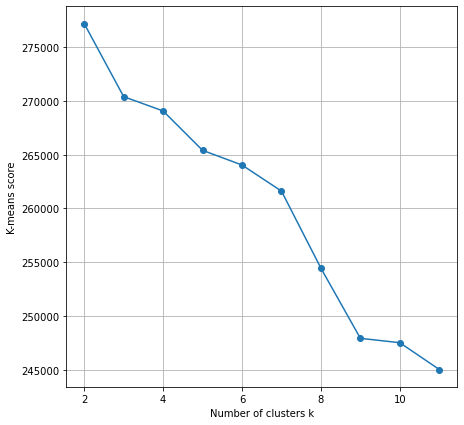

In [43]:
plt.figure(figsize=(7, 7))
plt.grid(True)
plt.plot(list_k, model_scores, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('K-means score');

График выше показывает, что k = 3 или k = 9 - неплохой выбор

## Анализ силуэта